# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 5.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)


In [6]:
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(df_hh_income.isna().values.any())
print(df_pct_poverty.isna().values.any())
print(df_pct_completed_hs.isna().values.any())
print(df_share_race_city.isna().values.any())
print(df_fatalities.isna().values.any())

True
False
False
False
True


In [8]:
print(df_hh_income.duplicated().values.any())
print(df_pct_poverty.duplicated().values.any())
print(df_pct_completed_hs.duplicated().values.any())
print(df_share_race_city.duplicated().values.any())
print(df_fatalities.duplicated().values.any())

False
False
False
False
False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [9]:
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().values.any()

False

In [10]:
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [11]:
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.str.replace('-', '0')  # some cities have no poverty rate, change that to 0 to avoid errors

In [12]:
df_pct_poverty = df_pct_poverty.astype({'poverty_rate':'float'}) 
poverty_rate_per_state = df_pct_poverty.groupby('Geographic Area').agg({'poverty_rate':pd.Series.mean})

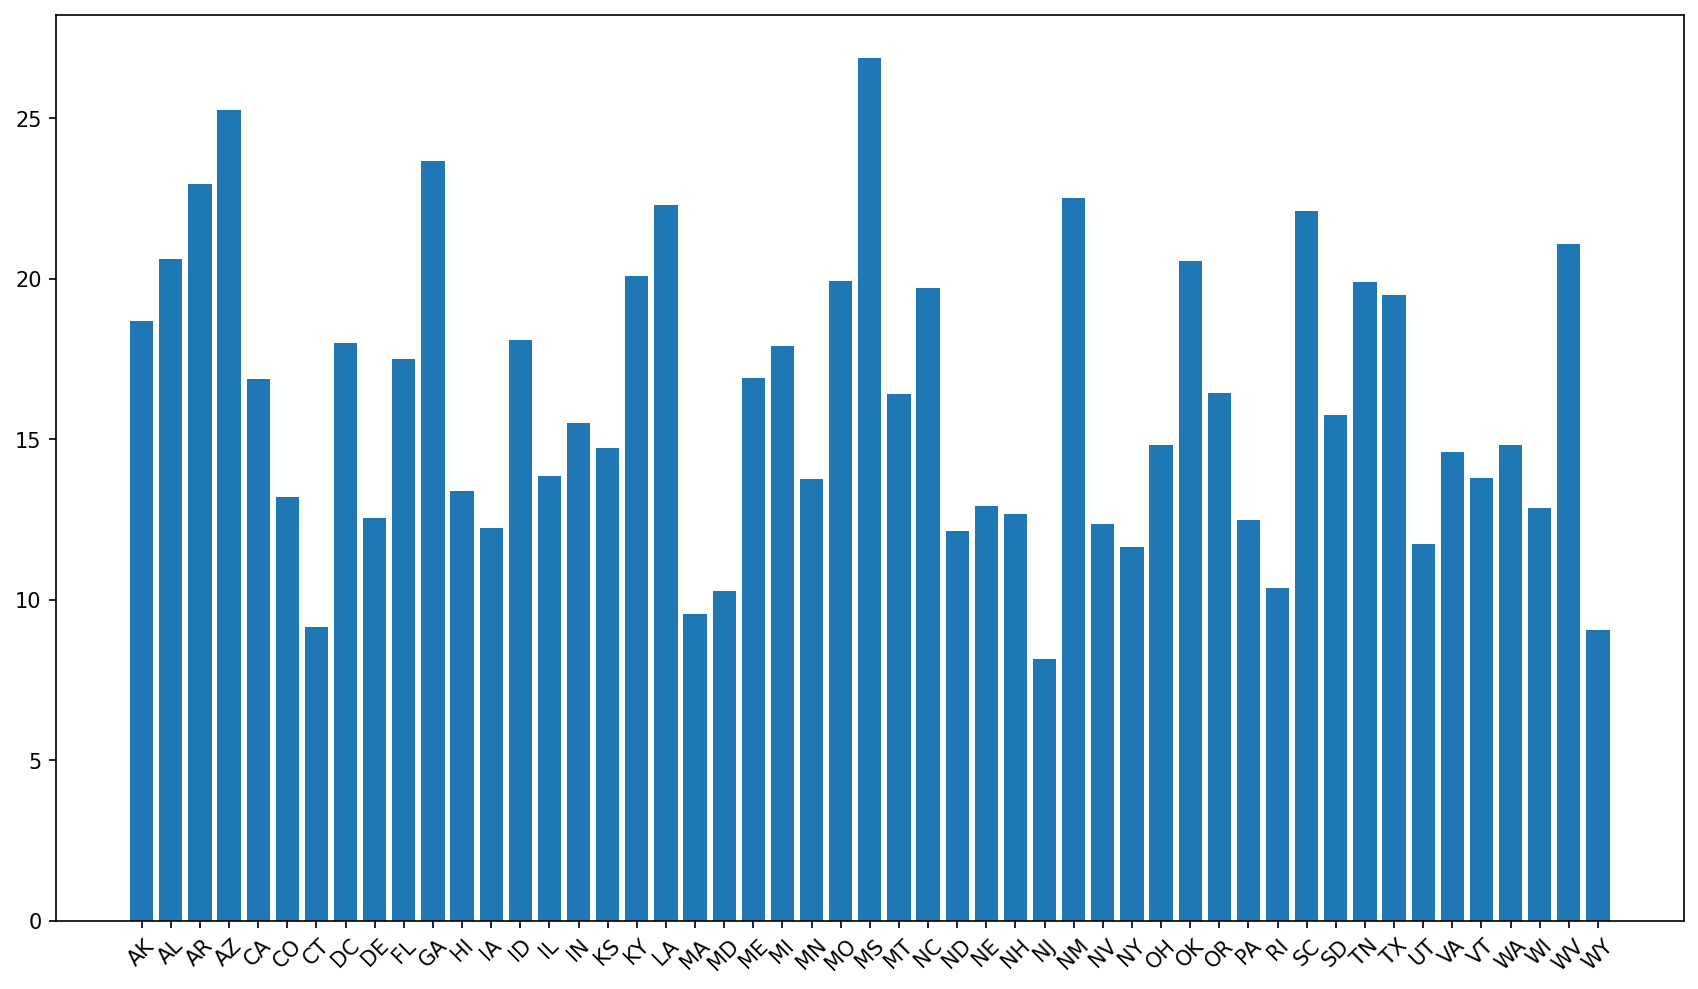

In [13]:
plt.figure(figsize=(14, 8), dpi=150)

plt.bar(
    x=poverty_rate_per_state.index,
    height=poverty_rate_per_state.poverty_rate
)

plt.xticks(ticks=poverty_rate_per_state.index, rotation=45)

plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [14]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.str.replace('-', '0')  # some cities have no data on hs graduation rate, change that to 0 to avoid errors

df_pct_completed_hs = df_pct_completed_hs.astype({'percent_completed_hs':'float'})

grad_rate_per_state = df_pct_completed_hs.groupby('Geographic Area').agg({'percent_completed_hs':pd.Series.mean})

In [15]:
grad_rate_per_state.sort_values('percent_completed_hs', ascending=False)

,percent_completed_hs
Geographic Area,
MA,92.03
HI,91.67
CT,91.59
ME,91.43
NH,90.71
NY,90.54
NJ,90.52
WI,90.26
MT,89.99


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

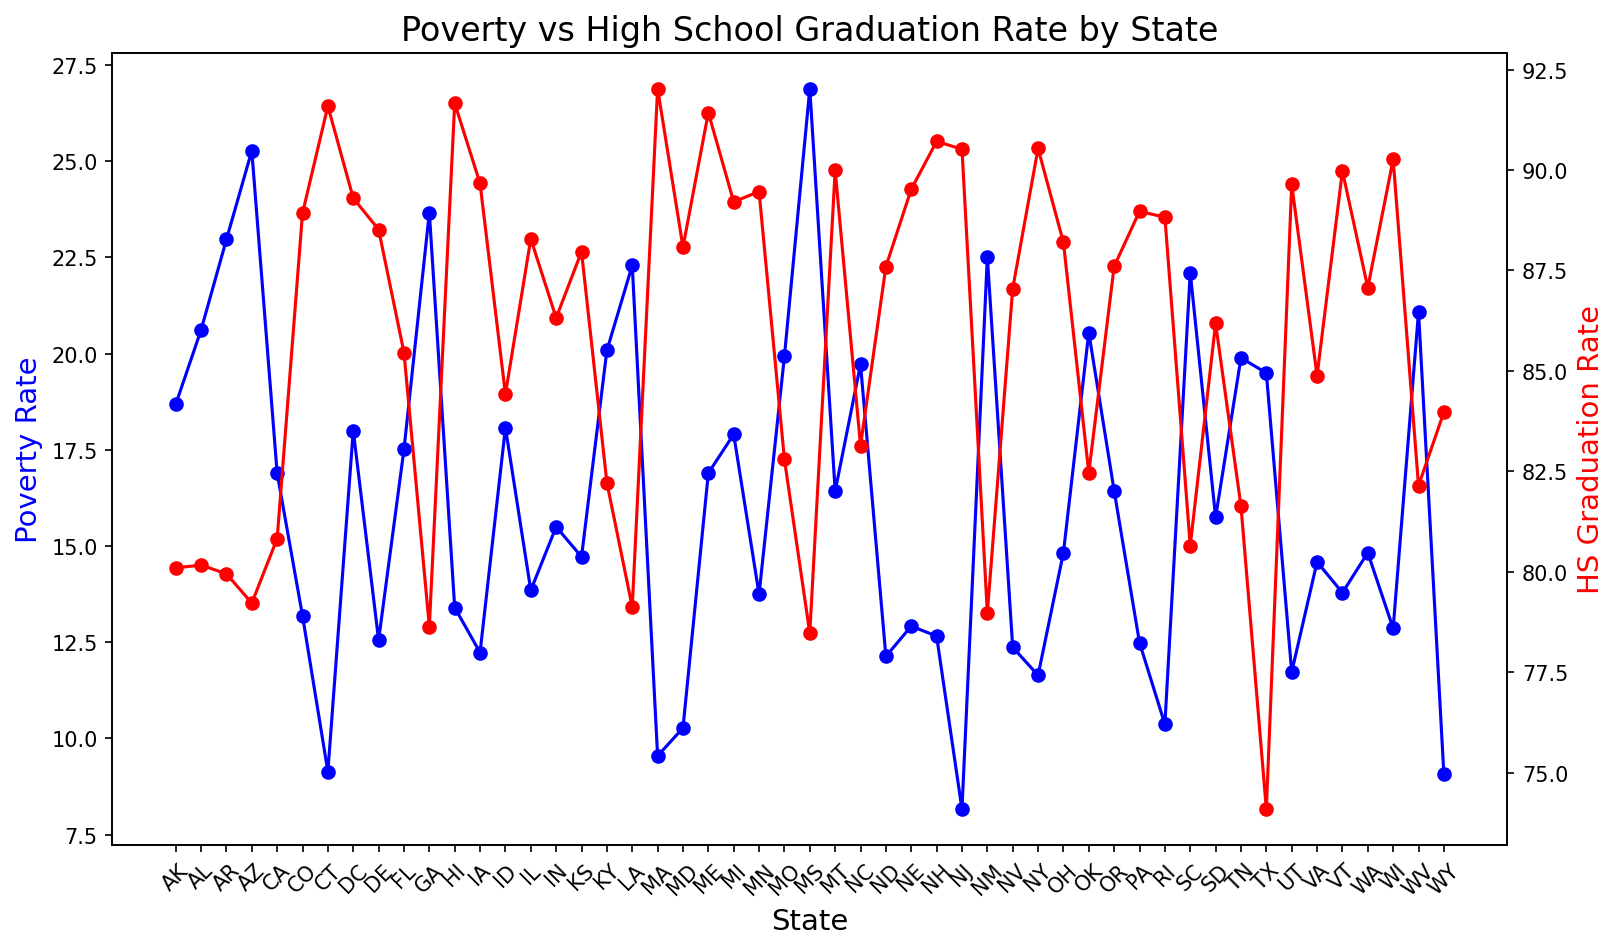

In [16]:
plt.figure(figsize=(12,7), dpi=150)
plt.title('Poverty vs High School Graduation Rate by State', fontsize=16)
plt.xticks(rotation=45)

ax1 = plt.gca()  # get current axes, i prefer this over fig,ax=plt.subplots() because it let's things like figsize work with less hassle
ax2 = ax1.twinx()  # get 2nd axis

# first axis, poverty

ax1.plot(
    poverty_rate_per_state.index,
    poverty_rate_per_state.poverty_rate,
    color='blue',
    marker='o'
)

ax1.set_xlabel("State", fontsize = 14)

ax1.set_ylabel("Poverty Rate",
              color="blue",
              fontsize=14)

# second axis, hs grad rate

ax2.plot(
    grad_rate_per_state.index,
    grad_rate_per_state.percent_completed_hs,
    color='red',
    marker='o'
)

ax2.set_ylabel("HS Graduation Rate",
              color="red",
              fontsize=14)

plt.draw()  # keep in mind to use draw() instead of show() when using twin axes

## As we can see, poverty rate and highschool graduation rate are inversely related, meaning the less people graduate high school, the more likely the poverty rate of that state is going to be high, and vice versa.

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

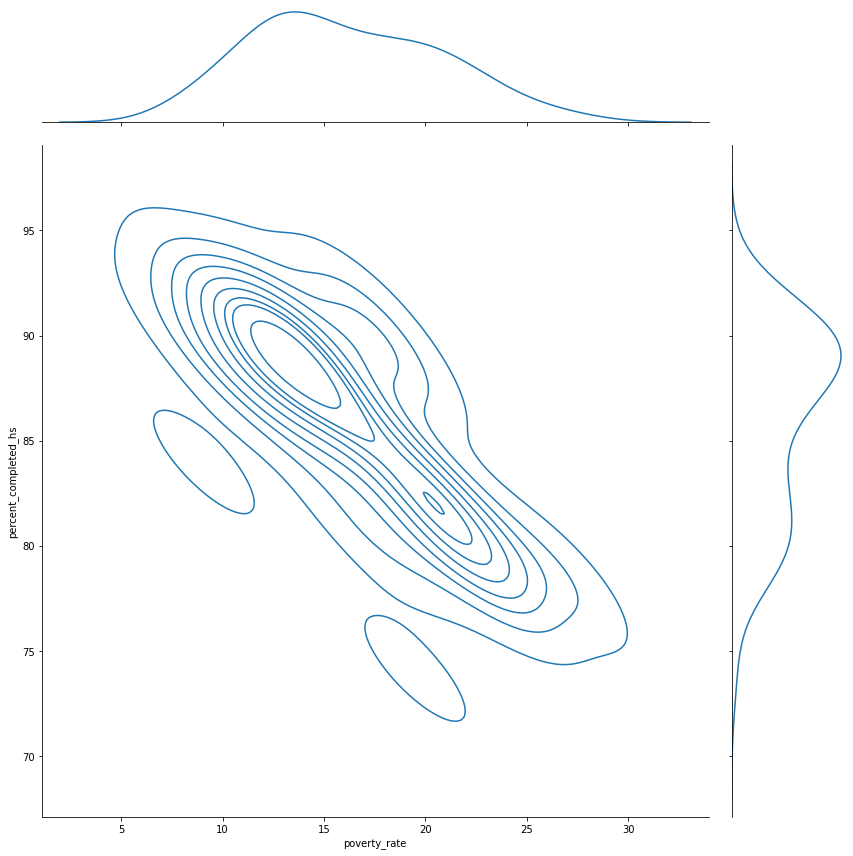

In [17]:
sns.jointplot(
    x=poverty_rate_per_state.poverty_rate,
    y=grad_rate_per_state.percent_completed_hs,
    kind='kde',
    height=12
)

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

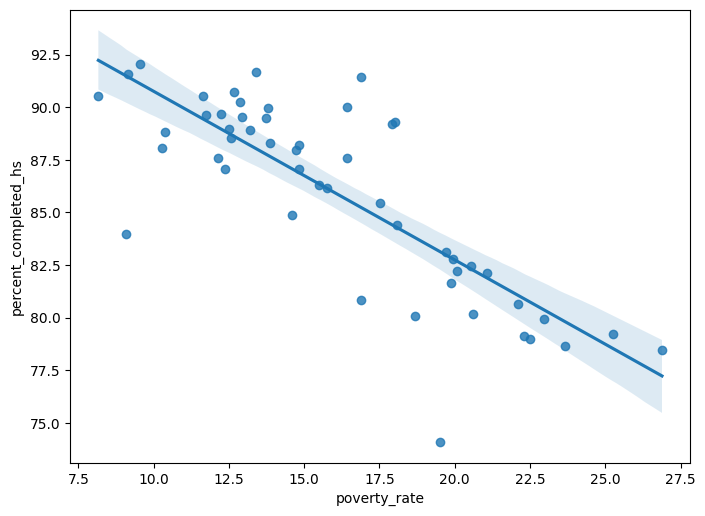

In [18]:
plt.figure(figsize=(8,6), dpi=100)

sns.regplot(
    x=poverty_rate_per_state.poverty_rate,
    y=grad_rate_per_state.percent_completed_hs,
    scatter=True,
    fit_reg=True,
)

plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

The data only includes racial makeup of cities, agg the data with mean to find an estimate for racial makeup of each state.

In [19]:
df_share_race_city = df_share_race_city.replace('(X)', '0')  # data with no value is (X), CHANGE IT TO 0
df_share_race_city = df_share_race_city.astype({'share_white':'float', 'share_black':'float', 'share_native_american':'float', 'share_asian':'float', 'share_hispanic':'float'})

state_racial_makeup = df_share_race_city.groupby('Geographic area').agg({'share_white':pd.Series.mean, 'share_black':pd.Series.mean, 'share_native_american':pd.Series.mean, 'share_asian':pd.Series.mean, 'share_hispanic':pd.Series.mean, })

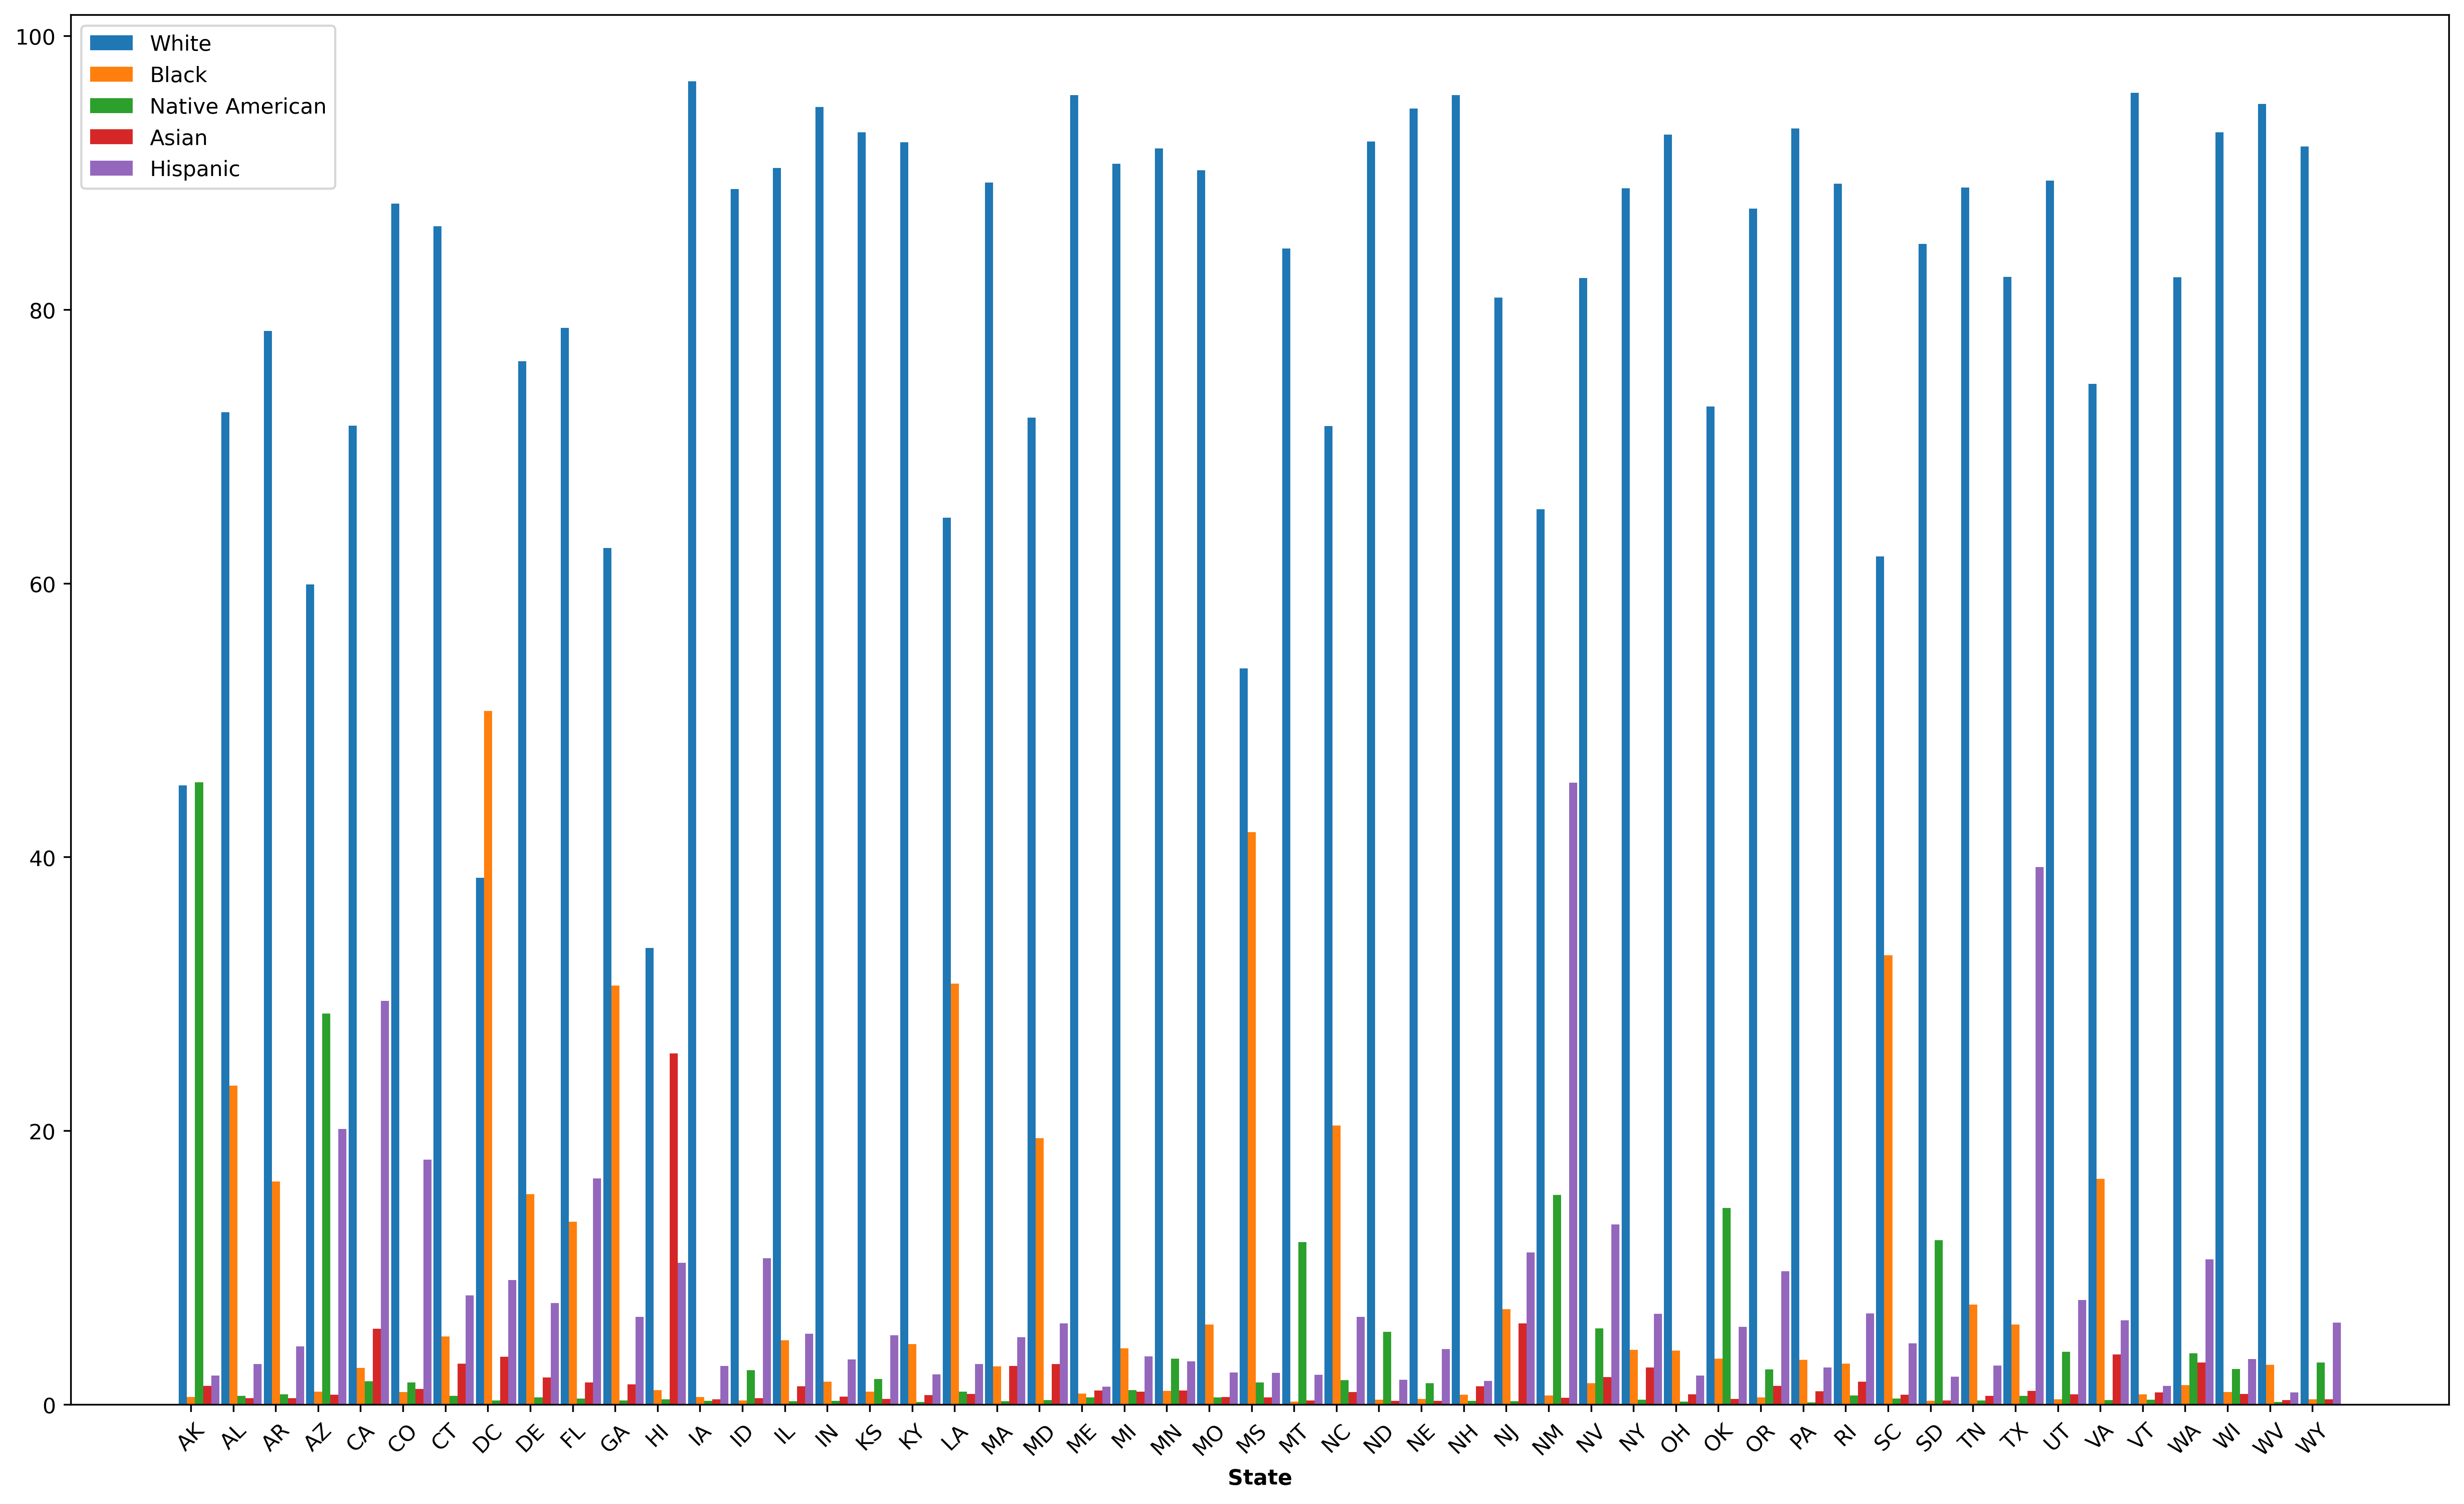

In [20]:
plt.figure(figsize=(20,12), dpi=400)


width=0.19  # width of the bars

# set the positions of the bars

r1 = np.arange(len(state_racial_makeup))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]

# plot the bars

plt.bar(r1, state_racial_makeup.share_white, width=width, label='White')
plt.bar(r2, state_racial_makeup.share_black, width=width, label='Black')
plt.bar(r3, state_racial_makeup.share_native_american, width=width, label='Native American')
plt.bar(r4, state_racial_makeup.share_asian, width=width, label='Asian')
plt.bar(r5, state_racial_makeup.share_hispanic, width=width, label='Hispanic')

# label the x axis, add the labels in the center of the bars and rotate labels

plt.xlabel('State', fontweight='bold')
plt.xticks([r + width for r in range(len(state_racial_makeup))], state_racial_makeup.index, rotation=45)

plt.legend()

plt.show() 

# Create Donut Chart by of People Killed by Race

In [21]:
# Change the letter for race to the full word so that it is easier to understand the data, I find the letter hard to read

df_fatalities.race = df_fatalities.race.str.replace('0', 'Other')  # if race is unknown, it was marked with a 0, change to other
df_fatalities.race = df_fatalities.race.str.replace('A', 'Asian')
df_fatalities.race = df_fatalities.race.str.replace('W', 'White')
df_fatalities.race = df_fatalities.race.str.replace('B', 'Black')
df_fatalities.race = df_fatalities.race.str.replace('O', 'Other')
df_fatalities.race = df_fatalities.race.str.replace('H', 'Hispanic')
df_fatalities.race = df_fatalities.race.str.replace('N', 'Native American')

In [22]:
df_fatalities.race.fillna('Other', inplace=True)

In [23]:
px.pie(
    values=df_fatalities.race.value_counts(),  # count of each race
    names=df_fatalities.race.unique(),  # use unique to get the category names
    hole=0.5,
    title='Distribution of People Killed by Race',
    width=800,
    height=800,
)

# Create a Dataframe Showing the Gender and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [24]:
df_fatalities.manner_of_death = df_fatalities.manner_of_death.str.replace('shot and Tasered', 'shot and tasered')  # fix the grammar

In [25]:
death_by_gender = df_fatalities.groupby(['gender', 'manner_of_death']).agg({'manner_of_death':pd.Series.count})

In [26]:
death_by_gender.rename(columns={'manner_of_death':'amount'},inplace=True)

In [27]:
death_by_gender

amount
gender manner_of_death         
F      shot                 102
       shot and tasered       5
M      shot                2261
       shot and tasered     167

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [28]:
armed = df_fatalities[df_fatalities.armed == 'gun'].count()[0]
unarmed =  df_fatalities[df_fatalities.armed == 'unarmed'].count()[0]
total = df_fatalities.count()[0]

In [29]:
print(f"{armed*100/total:.4}% were armed and {unarmed*100/total:.3}% were unarmed.")

55.15% were armed and 6.75% were unarmed.


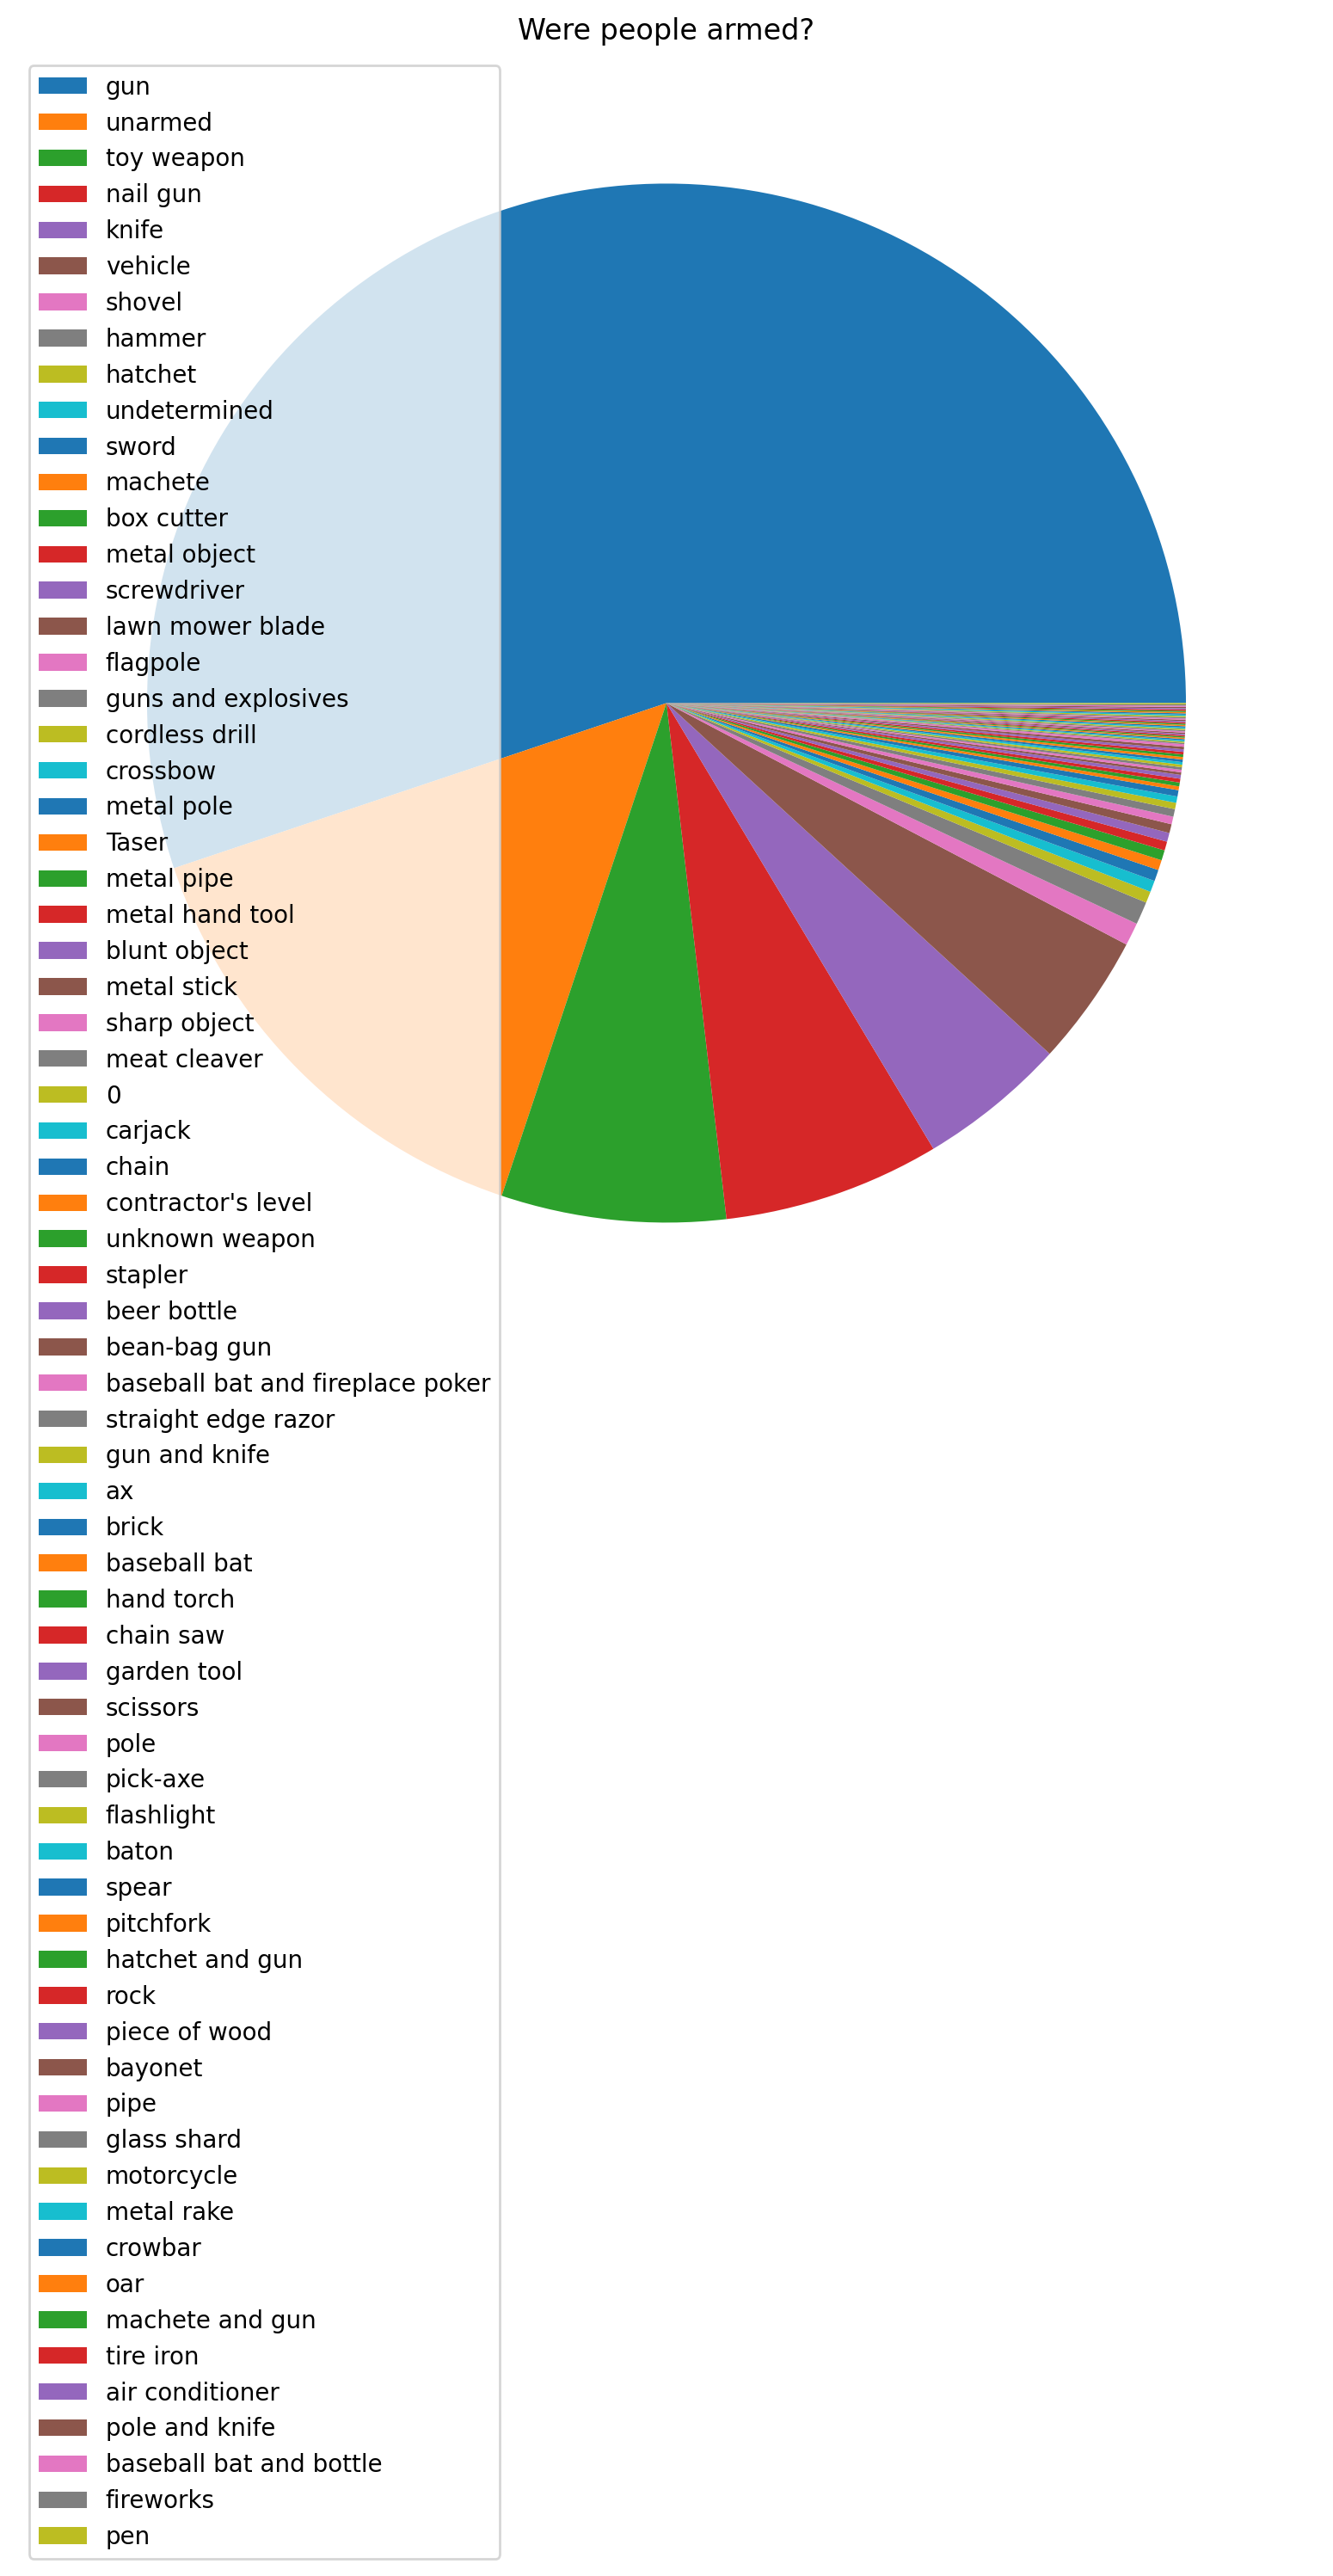

In [30]:
plt.figure(figsize=(10,10), dpi=200)

plt.pie(
    x=df_fatalities.armed.value_counts(),
    labels=df_fatalities.armed.unique(),
    autopct=None,  # remove pcts because there are so many
    labeldistance=None  # remove labels aswell
)

plt.legend()
plt.title('Were people armed?')

plt.show()

# How Old Were the People Killed?


Work out what percentage of people killed were under 25 years old.  

In [32]:
try:
  df_fatalities.age = df_fatalities.age.str.replace('Other', '0')
except:
  pass
  
df_fatalities = df_fatalities.astype({'age':'float'})

In [33]:
print(f"{df_fatalities[df_fatalities.age < 25].count()[0] * 100/df_fatalities.count()[0]:.3}%")

20.8%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

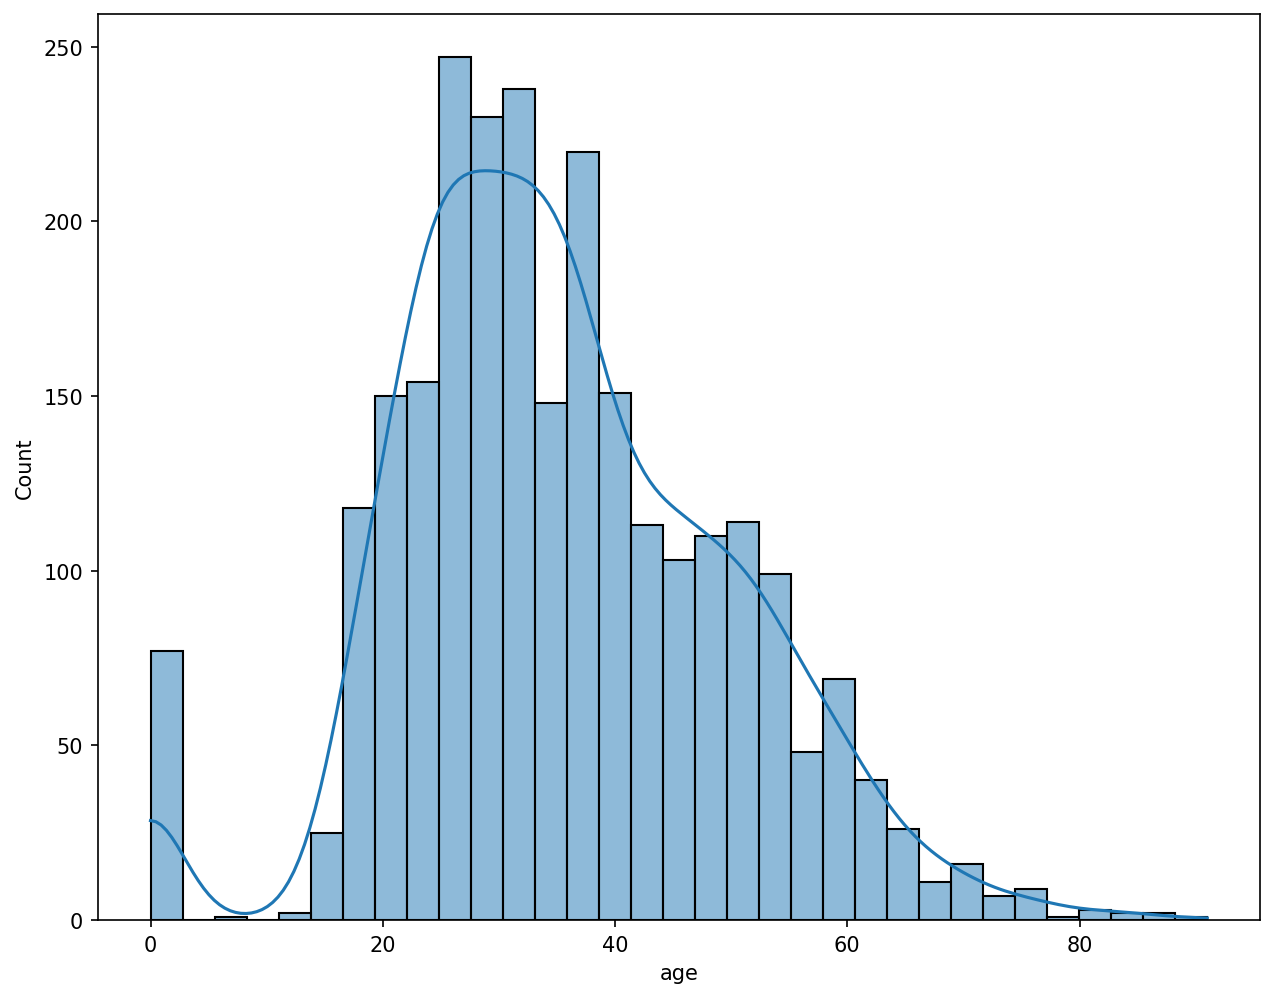

In [34]:
plt.figure(figsize=(10,8), dpi=150)

sns.histplot(
  x = df_fatalities.age,
  kde=True
)

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

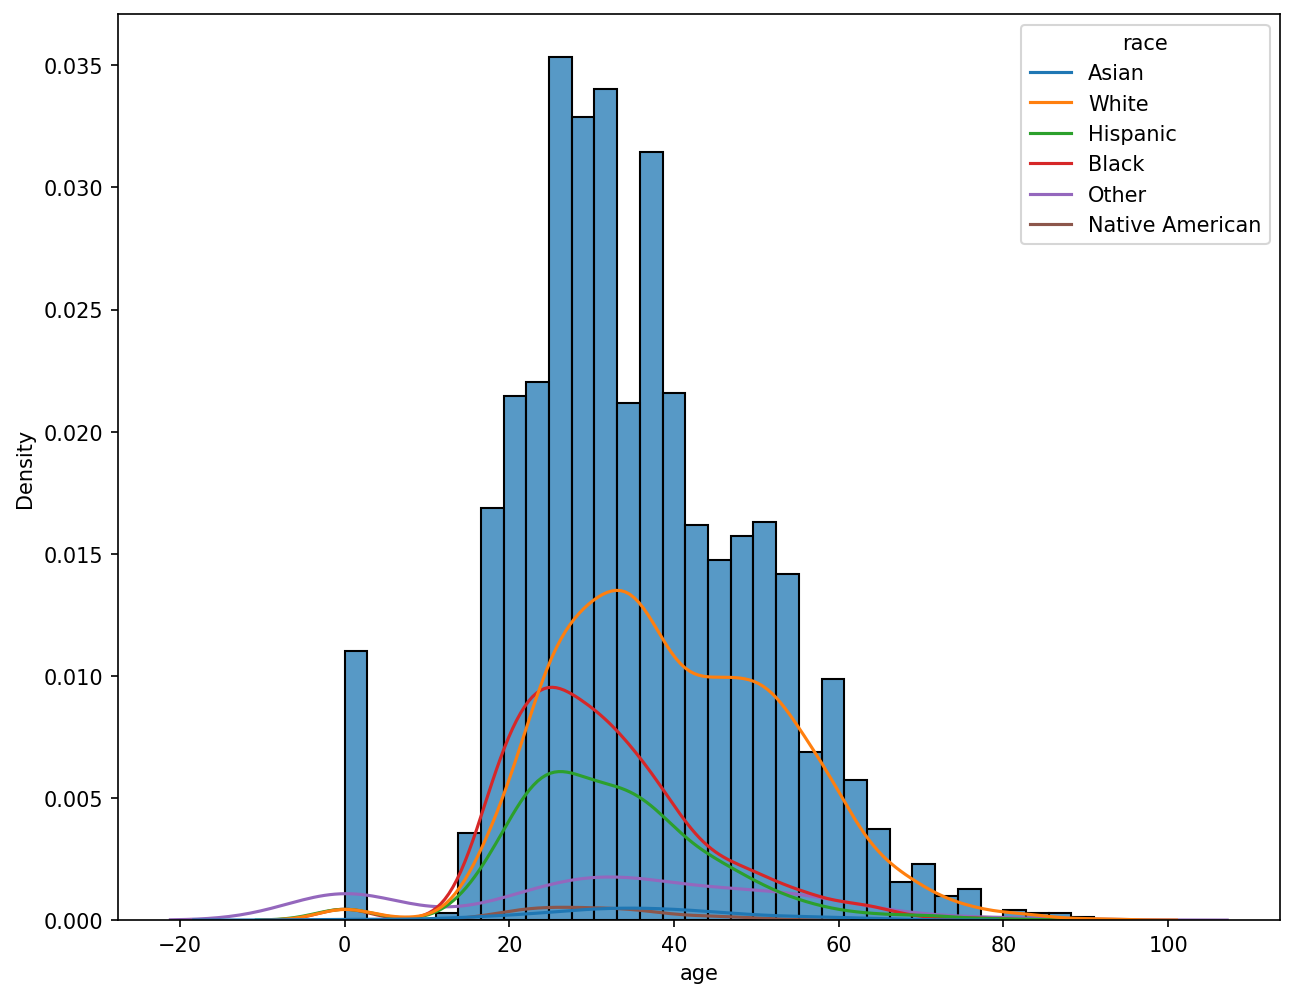

In [35]:
plt.figure(figsize=(10,8), dpi=150)

sns.histplot(
  x = df_fatalities.age,
  stat='density'  # so we can use KDE along with it, since you can't pass hue to kws_kde
)

sns.kdeplot(
  x = df_fatalities.age,
  hue = df_fatalities.race
)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

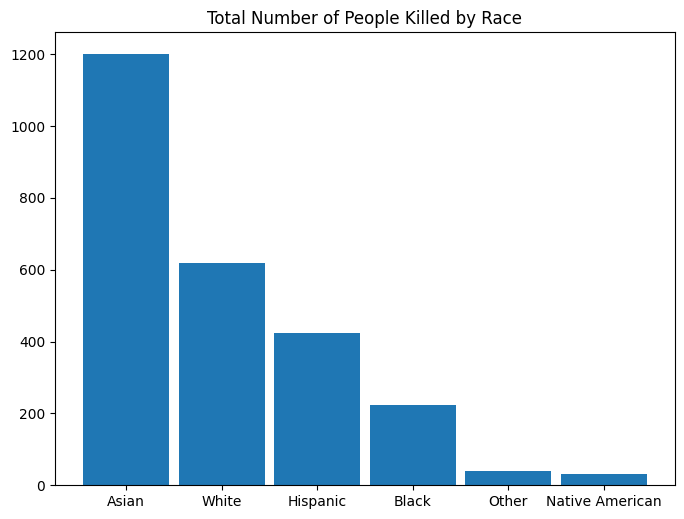

In [36]:
plt.figure(figsize=(8,6), dpi=100)

plt.bar(
    x=df_fatalities.race.unique(),
    height=df_fatalities.race.value_counts(),
    width=0.9
)

plt.title('Total Number of People Killed by Race')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [37]:
print(f"{df_fatalities[df_fatalities.signs_of_mental_illness == True].count()[0] * 100/df_fatalities.count()[0]:.4}% of people killed were diagnosed with a mental illness.")

24.97% of people killed were diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [38]:
most_dangerous_cities = df_fatalities.groupby('city').size()
most_dangerous_cities = most_dangerous_cities.sort_values(ascending=False).head(10)  # take the top 10

In [39]:
px.pie(
    values=most_dangerous_cities,
    names=most_dangerous_cities.index,
    title='Distribution of Killings in 10 Most Dangerous Cities',
    width=800,
    height=800,
)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [40]:
df_share_race_city[df_share_race_city.City.isin(most_dangerous_cities.index)]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


In [41]:
most_dangerous_cities.index.isin(df_share_race_city.City.unique())

array([False, False, False, False, False, False, False, False, False,
       False])

There is no race data for the top 10 cities, weirdly, I checked manually under every known monicker for those cities.

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare it to the poorest states.

In [48]:
most_dangerous_states = df_fatalities.groupby('state').size()
most_dangerous_states.sort_values(ascending=False, inplace=True)

In [50]:
px.choropleth(
    locations=most_dangerous_states.index,
    locationmode='USA-states',
    color=most_dangerous_states,
    scope='usa'
)

In [126]:
px.choropleth(
    locations=poverty_rate_per_state.index,
    locationmode='USA-states',
    color=poverty_rate_per_state.poverty_rate,
    scope='usa'
)

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [87]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)  # convert to datetime format

In [88]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.dates as mdates
register_matplotlib_converters()

In [89]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [104]:
# use grouper to group data by month without skipping over years and keeping the format as datetime

killings_over_time = df_fatalities.groupby(pd.Grouper(key='date', freq='1M')).size()

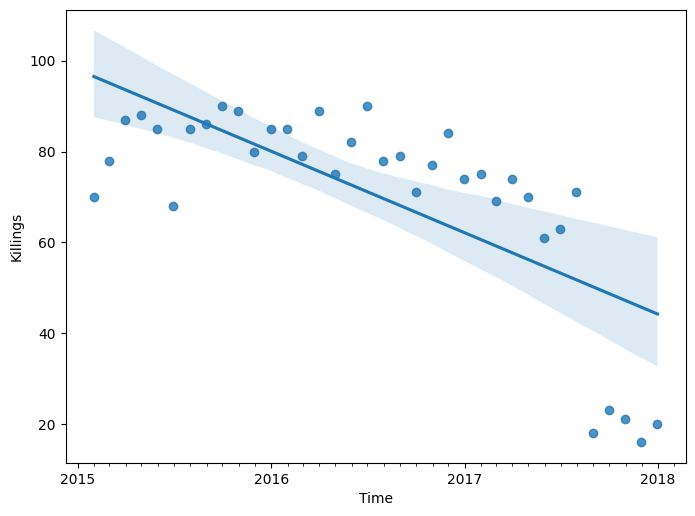

In [119]:
plt.figure(figsize=(8,6), dpi=100)

ax = plt.gca()

ax.xaxis.update_units(killings_over_time.index)  # no support for datetime on regplots so we use this

ax = sns.regplot(
    x=ax.xaxis.convert_units(killings_over_time.index),  # and this to be able to plot it properly, not sure how it works found it on github
    y=killings_over_time,
    scatter=True,
    fit_reg=True,
)

ax.xaxis.set_major_locator(years)  # if we don't use these, x axis will be formatted such as 2015-1 - - - - - - 2015-7, which isn't very legible
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.set_xlabel('Time')
ax.set_ylabel('Killings')

plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).